In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
208,15800890,Female,40,142000,1


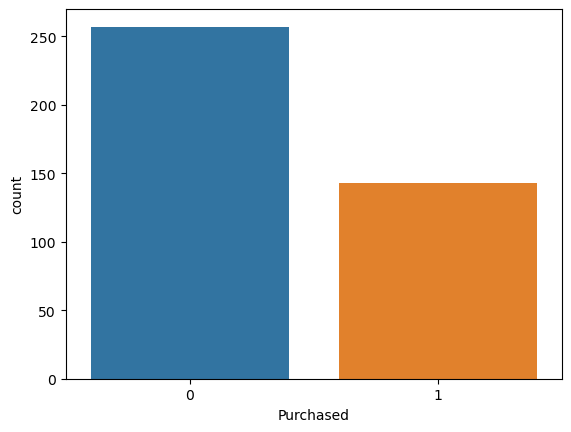

In [10]:
sns.countplot(x='Purchased',data=df)
plt.show()

<Axes: xlabel='Purchased', ylabel='count'>

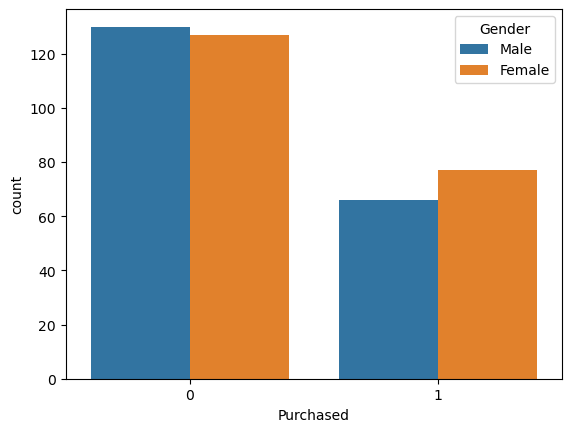

In [11]:
sns.countplot(x='Purchased', hue='Gender', data=df)

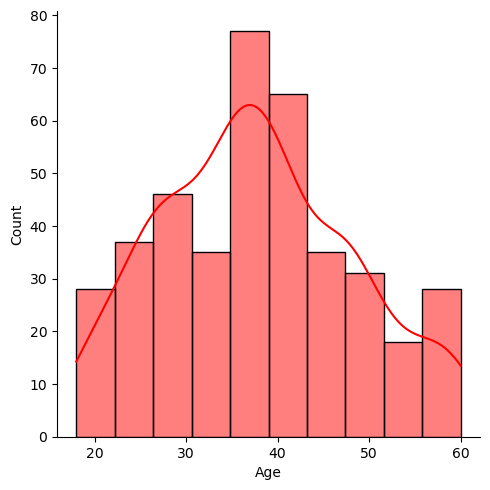

In [12]:
sns.displot(x='Age', data=df, color='red', kde=True)

In [16]:
df.drop('User ID', axis=1, inplace=True)

KeyError: "['User ID'] not found in axis"

In [17]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [21]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [22]:
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [24]:
print(gender)

     Male
0       1
1       1
2       0
3       0
4       1
..    ...
395     0
396     1
397     0
398     1
399     0

[400 rows x 1 columns]


In [25]:
df.drop('Gender',axis=1,inplace=True)

In [26]:
df = pd.concat([df,gender], axis=1)

In [27]:
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [28]:
X = df.iloc[:,[0,1,3]] # Age, EstimatedSalary and MaleX.head()

In [29]:
y = df.iloc[:, 2] # Purchased

In [35]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [36]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(280, 3)
(120, 3)
(280,)
(120,)


In [37]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
classifier.coef_ # array([[2.36839196, 1.42929561, 0.20973787]])classifier.intercept_ # array([-1.1352347])

array([[2.36839196, 1.42929561, 0.20973787]])

In [40]:
print(classifier.predict_proba(X))

[[9.99305047e-01 6.94953436e-04]
 [9.73650395e-01 2.63496050e-02]
 [9.93938614e-01 6.06138563e-03]
 [9.86425967e-01 1.35740330e-02]
 [9.92449933e-01 7.55006749e-03]
 [9.78634880e-01 2.13651200e-02]
 [9.59015410e-01 4.09845897e-02]
 [3.21160956e-01 6.78839044e-01]
 [9.95160538e-01 4.83946203e-03]
 [8.94774017e-01 1.05225983e-01]
 [9.71990649e-01 2.80093506e-02]
 [9.91181077e-01 8.81892308e-03]
 [9.85694423e-01 1.43055770e-02]
 [9.87533664e-01 1.24663357e-02]
 [9.92255565e-01 7.74443464e-03]
 [9.20459783e-01 7.95402167e-02]
 [6.64896819e-01 3.35103181e-01]
 [7.49443667e-01 2.50556333e-01]
 [6.86862714e-01 3.13137286e-01]
 [6.70546154e-01 3.29453846e-01]
 [7.79633457e-01 2.20366543e-01]
 [5.24342635e-01 4.75657365e-01]
 [4.47060141e-01 5.52939859e-01]
 [8.43313433e-01 1.56686567e-01]
 [7.30142964e-01 2.69857036e-01]
 [7.09930944e-01 2.90069056e-01]
 [5.26688397e-01 4.73311603e-01]
 [7.09899857e-01 2.90100143e-01]
 [9.82040967e-01 1.79590333e-02]
 [9.90032335e-01 9.96766502e-03]
 [9.044789

In [42]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[63,  9],
       [14, 34]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

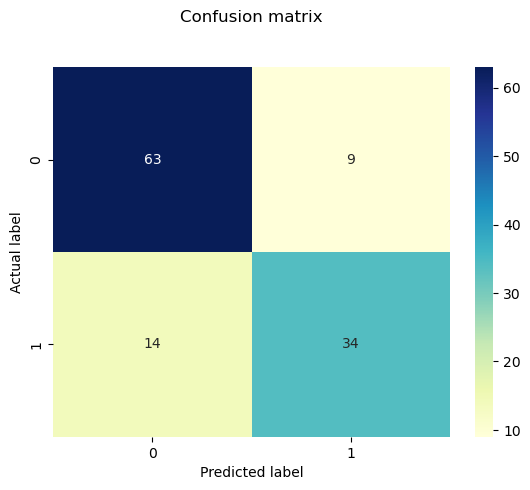

In [43]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
from sklearn.metrics import accuracy_score
Accuracy = (63 + 34)/(63 + 34 + 9 + 14)
Accuracy # 0.8083333333333333 
# Also same result from sklearn accuracy_scorefrom sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred) #0.8083333333333333

0.8083333333333333

In [47]:
from sklearn.metrics import classification_report
target_names = ['will NOT PURCHASE', 'will PURCHASE']

print(classification_report(y_test, y_pred,target_names=target_names))

                   precision    recall  f1-score   support

will NOT PURCHASE       0.82      0.88      0.85        72
    will PURCHASE       0.79      0.71      0.75        48

         accuracy                           0.81       120
        macro avg       0.80      0.79      0.80       120
     weighted avg       0.81      0.81      0.81       120

